<a href="https://colab.research.google.com/github/Ramkumar-stack/Odin-Cap/blob/main/Copy_of_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

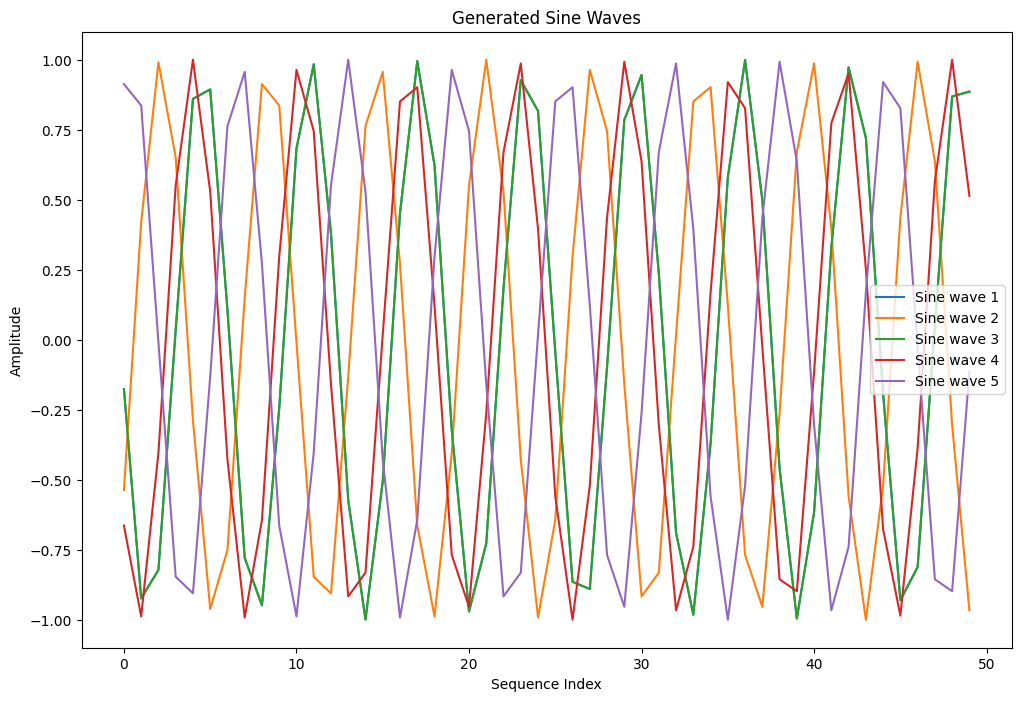

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave dataset
def generate_sine_wave(sequence_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        start = np.random.randint(0, 100)
        sine_wave = np.sin(np.arange(start, start + sequence_length))
        X.append(sine_wave)
        y.append(np.sin(start + sequence_length))
    return np.array(X), np.array(y)

sequence_length = 50
num_samples = 1000
X, y = generate_sine_wave(sequence_length, num_samples)

# Plot a few of the generated sine waves
num_waves_to_plot = 5
plt.figure(figsize=(12, 8))

for i in range(num_waves_to_plot):
    plt.plot(X[i], label=f'Sine wave {i+1}')

plt.title('Generated Sine Waves')
plt.xlabel('Sequence Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


x-values (Sequence Indices) for Sine Wave 1:
[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]

y-values (Sine Values) for Sine Wave 1:
[-0.50636564  0.9916623  -0.1778312  -0.89675842  0.74675295  0.34990391
 -0.99138923  0.49102159  0.50827908 -0.99116428  0.35726806  0.73054258
 -0.89596869 -0.18138978  0.99213373 -0.51808654 -0.49595124  0.99409511
 -0.34307386 -0.74982717  0.88932715  0.20487546 -0.99336101  0.5065587
  0.48476844 -0.99608543  0.35030754  0.73913713 -0.88592482 -0.20773249
  0.99256711 -0.52247835 -0.47211254  0.99810333 -0.3361193  -0.75744858
  0.87909333  0.23094974 -0.99372349  0.50980392  0.46165818 -0.99984247
  0.34321716  0.74655965 -0.87511428 -0.2342258   0.99203677 -0.52680023
 -0.44815362  1.00031709]

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.7903 - val_loss: 0.0083
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0174 - val_loss: 0.0018
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.2250e-04 - val_loss: 4.6483e-04
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6374e-04 - val_loss: 3.1494e-04
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3133e-04 - val_loss: 3.0040e-04
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8000e-04 - val_loss: 2.9877e-04
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9924e-04 - val_loss: 2.7156e-04
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8562e-04 - val_loss: 2.6803e-04
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4611e-04 - val_loss: 2.4662e-04
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5380e-04 - val_loss: 2.3632e-04
Epoch 12/20
20/20

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


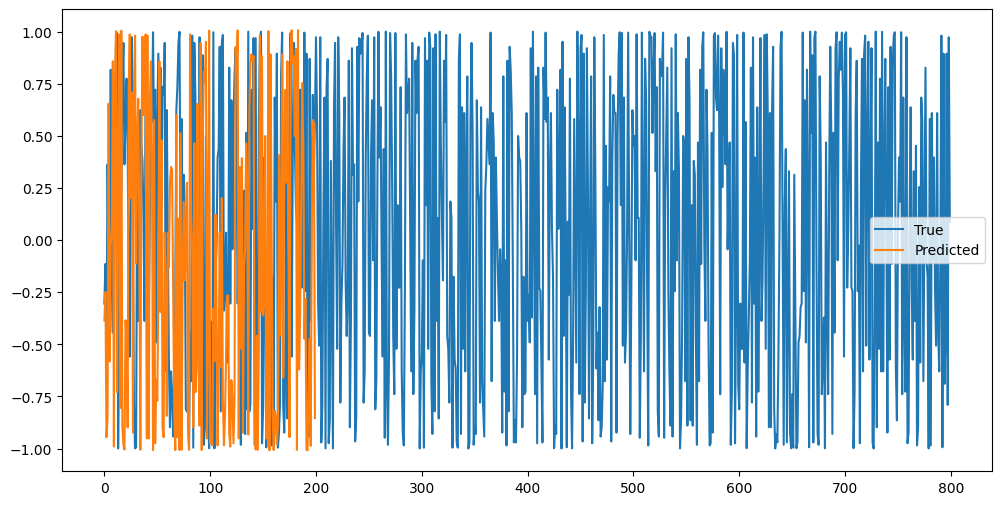

In [ ]:
# Install TensorFlow
#!pip install tensorflow

# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Generate a sine wave dataset
def generate_sine_wave(sequence_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        start = np.random.randint(0, 100)
        sine_wave = np.sin(np.arange(start, start + sequence_length))
        X.append(sine_wave)
        y.append(np.sin(start + sequence_length))
    return np.array(X), np.array(y)

sequence_length = 50
num_samples = 1000
X, y = generate_sine_wave(sequence_length, num_samples)

# Split the data into training and testing sets
split = int(0.8 * num_samples)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape the data to fit the RNN input requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(32, input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Summary of Internal Values
Matrix (W): (1, 32)
Recurrent Kernel Matrix (U): (32, 32)
Bias Vector (b): (32)
Activation Function: Typically tanh
Hidden State (h_t): Shape (32), updated at each time step

The code snippet you provided is reshaping the training and testing datasets (`X_train` and `X_test`) to fit the input requirements of an RNN (Recurrent Neural Network). Here's a detailed explanation of what each line does:

### Understanding the Context

For RNNs, the input data generally needs to be in a 3D shape:
- **(batch_size, timesteps, features)**.

Here’s what each dimension represents:
- **batch_size**: The number of sequences (samples) processed together in one pass.
- **timesteps**: The number of time steps (sequence length) in each sample.
- **features**: The number of features per time step (typically 1 for univariate time series data).

### Code Explanation

```python
# Reshape the data to fit the RNN input requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
```

#### 1. `X_train.shape[0]`
- **Explanation**: This represents the number of samples in the training set, i.e., the **batch_size**.
- **Reason**: The batch size indicates how many sequences the RNN will process at once.

#### 2. `X_train.shape[1]`
- **Explanation**: This represents the number of time steps in each sample, i.e., the **timesteps**.
- **Reason**: RNNs process sequences over time, so the second dimension represents the length of each sequence.

#### 3. `1`
- **Explanation**: This indicates that there is only one feature per time step.
- **Reason**: If you have univariate time series data (e.g., stock prices over time), each time step has one feature (the price at that time).

### Example with Data Shapes

- Suppose `X_train` has a shape of `(1000, 30)` before reshaping:
  - **1000**: Number of samples (sequences).
  - **30**: Number of time steps in each sequence.

- After reshaping, `X_train` would have a shape of `(1000, 30, 1)`:
  - **1000**: Number of samples (same as before).
  - **30**: Number of time steps (same as before).
  - **1**: Number of features (added this dimension).

### Why This Reshaping is Necessary

RNNs expect the input data to have three dimensions. The reshaping step adds the third dimension (features per time step) to your data, making it compatible with the input format required by RNN layers in frameworks like TensorFlow or PyTorch.

If your data is multivariate (more than one feature per time step), the third dimension would be greater than 1. For example, if you had two features per time step, you would reshape to `(batch_size, timesteps, 2)`.

### In Summary

- The code reshapes the data to fit the expected input format of RNNs.
- The new shape is `(batch_size, timesteps, features)`.
- This step is essential to ensure the RNN can process the input sequences correctly.

In [ ]:
#1. Running
from transformers import BlenderbotTokenizer, BlenderbotForConditionalGeneration

# Load the tokenizer and model
tokenizer = BlenderbotTokenizer.from_pretrained("facebook/blenderbot-400M-distill")
model = BlenderbotForConditionalGeneration.from_pretrained("facebook/blenderbot-400M-distill")

def chat_with_blenderbot():
    # Initialize the conversation history
    conversation_history = []

    print("BlenderBot: Hi! I'm BlenderBot. How can I help you today?")

    while True:
        # Get user input
        user_input = input("You: ")

        # Exit the conversation if the user types "exit"
        if user_input.lower() in ["exit", "quit", "bye"]:
            print("BlenderBot: Goodbye!")
            break

        # Append user input to the conversation history
        conversation_history.append(user_input)

        # Tokenize the conversation history and generate a response
        inputs = tokenizer(" ".join(conversation_history), return_tensors="pt")
        reply_ids = model.generate(**inputs)
        response = tokenizer.decode(reply_ids[0], skip_special_tokens=True)

        # Print the response and add it to the conversation history
        print(f"BlenderBot: {response}")
        conversation_history.append(response)

# Run the chatbot
chat_with_blenderbot()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

BlenderBot: Hi! I'm BlenderBot. How can I help you today?
You: good morning
BlenderBot:  Good morning! How are you? I just got back from a long day of work. 
You: Even me too
BlenderBot:  What do you do for work? I work at a grocery store as a cashier.
You: I am data science trainer
BlenderBot:  That sounds like a fun job.  I work in an office.  What kind of food do you sell?
You: What is the procedure to count the cash
BlenderBot:  I sell fresh fruits and veggies. Counting the money is easy.
You: bye
BlenderBot: Goodbye!
